# Support Vector Machine
## Objective

As a result of completing this exercise you should be able to:

- Understand the concept of  margins, support vectors, hyperplane, decision boundary
- Understand the concept of Support Vector Machine (SVM)
- Load real-world data from `sklearn` datasets
- Use `sklearn` to implement a linear SVM classification
- Use `sklearn` to implement a non-linear SVM classification with kernel
- Display decision boundary using `matplotlib`
- Evaluate the classficiation output with classification report using `scikit-learn`

## Import Libraries

Do this, if you prefer to import all the packages together in beginning of the notebook, and remember to run this cell first every time before you run other cells that need packages.

If you prefer to import packages one by one later, you can skip this section. Do remember to import packages when you need to use them in the latter cells.

In [1]:
# import packages for future use in this notebook 
# please import the packages you plan to use, if prefered
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')

## Define functions to be used in later cells in this notebook

### Definea function to visualize the decision regions or decision bounaries 

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


## Classification - Examples

<a name="eg1"></a>
### Example 1 - SVM with Linear Model for a Built-in Dataset (Iris)

<a name="eg1-preprocess"></a>
#### Preprocessing

##### Load data

In [5]:
# if you haven't loaded the package before, import the packages and methods
from sklearn import datasets
import numpy as np

# load the iris data; get two features; get the species
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


A basic SVM is bineary linear model, which can only classfiy data with two labels or classes. Thus, here we extract samples from two groups in the data. In this example, we get these two species: the Setosa Iris flowers and Versicolor Iris flowers.

In [4]:
# get the subset of samples: Setosa and Veriscolor
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
# double check the labels in samples
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


##### Split training samples into training set and test set

In [7]:
# load necessary package and methods, if you havne't
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


#### Standardize features (Normalize features)

In [9]:
# load necessary package and methods, if you havne't
from sklearn.preprocessing import StandardScaler

# normalize or standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<a name="eg1-learning"></a>
#### Learning - Training a Basic SVM (Binary Linear) Classification Model
Fit or train a SVM linear classification model

You may want to check the [referece](https://scikit-learn.org/stable/modules/svm.html#classification) out

In [10]:
# load necessary package and methods, if you havne't
from sklearn.svm import SVC

# build a SVM Classifier model
# set the classifier
svm_clf = SVC(kernel="linear", C=float("inf"), max_iter= 5000, decision_function_shape='ovo')

# fit the classifier from training set
svm_clf.fit(X_train_std, y_train)


SVC(C=inf, decision_function_shape='ovo', kernel='linear', max_iter=5000)

<a name="eg1-predict"></a>
#### Prediction
Predict the label or class for new x values (or new features)

In [11]:
# get prediction for an Iris flower with petal length as 5 and petal widith as 2
X_new = np.array([[5, 2]])
X_new_std = sc.transform(X_new)
y_hat = svm_clf.predict(X_new_std)
print(y_hat)

[2]


In [12]:
# get prediction for all the samples in the test set
y_hats = svm_clf.predict(X_test_std)
print(y_hats)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [13]:
# if interested, get output of decision function for all the samples in the test set
svm_clf.decision_function(X_test_std)

array([[-4.61404432e+00, -1.74896504e+00, -1.09532749e+01],
       [ 1.15362381e+00,  1.07609199e+00,  1.81294639e+01],
       [ 1.53813503e+00,  1.26482762e+00,  1.94927018e+01],
       [-2.99909726e+00, -9.58965247e-01, -1.34143133e+00],
       [-2.46078161e+00, -6.97126363e-01,  4.02202856e+00],
       [-1.99936814e+00, -4.70344724e-01,  5.22568393e+00],
       [-4.15263097e+00, -1.52816091e+00, -1.11140137e+00],
       [-2.69148832e+00, -8.09769993e-01,  2.34035220e+00],
       [-3.92192419e+00, -1.41252853e+00, -3.74886223e+00],
       [ 1.46123281e+00,  1.22827600e+00,  1.74923429e+01],
       [ 1.30742831e+00,  1.15218399e+00,  1.78106593e+01],
       [-3.46051073e+00, -1.18574689e+00, -2.54527458e+00],
       [ 1.69193950e+00,  1.33942525e+00,  2.13336508e+01],
       [-9.99638989e-01,  1.97701785e-02,  9.63329352e+00],
       [ 1.69193950e+00,  1.33942525e+00,  2.13336508e+01],
       [-2.76839060e+00, -8.49310374e-01,  4.65938989e+00],
       [-4.38333757e+00, -1.63482703e+00

In [14]:
# print the truth y_test
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


<a name="eg1-evaluate"></a>
#### Quick Model Eavluation: Classficiation Report


In [15]:
# load necessary package and methods, if you havne't
from sklearn.metrics import classification_report

# genereate and print the classification report
target_names = ['class 0: Setosa', 'class 1: Versicolor', 'class 2: Virginica']

# genereate and print the classification report
print(classification_report(y_test, y_hats, target_names=target_names))

                     precision    recall  f1-score   support

    class 0: Setosa       1.00      1.00      1.00        15
class 1: Versicolor       1.00      1.00      1.00        15
 class 2: Virginica       1.00      1.00      1.00        15

           accuracy                           1.00        45
          macro avg       1.00      1.00      1.00        45
       weighted avg       1.00      1.00      1.00        45



Questions:
- For each class:
    - What does precision mean? fraction of relevant instances among retrieved instances
    - What does recall mean? fraction of relevant instances retrieved
    - What does F-score (F1-score mean)? measure that combines the preicision and recall using a harmonic mean
    - What does support mean? number of occurences in each class of y_true
- What does accuracy of the model mean? weighted mean of preicison and inverse precision, as well as recall and inverse recall
- How good is our SVM classification model does? This model has a high accuracy, meaning there are not false negatives or positives.

You may want to check out [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), and [F-score](https://en.wikipedia.org/wiki/Precision_and_recall)

#### Plot the decision boundary

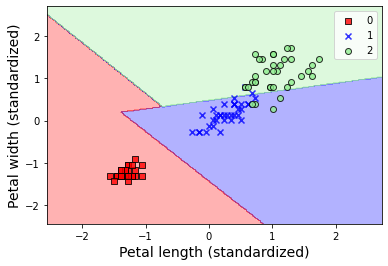

In [16]:
# load necessary package and methods, if you havne't
import matplotlib.pyplot as plt

# plot the training set and the decision boundrary
plot_decision_regions(X_train_std, y_train,svm_clf)
plt.xlabel("Petal length (standardized)", fontsize=14)
plt.ylabel("Petal width (standardized)", fontsize=14)
plt.legend(loc="best")
plt.show()

Questions:
- What if you want to do mutli-classification using SVM?
    - What should you modify in the preprocessing step? Skip cell 4
    - Which parameter or argument you should add or change in the `svc` function? decision_function_shape='ovo',
    - What should you modify in the classification report step? Add new target name
    
You may want to check the [referece](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) out


<a name="eg2"></a>
### Example 2 - SVM with Non-linear Model for a Simulation Data from `make_moons` Methods

<a name="eg2-preprocess"></a>
#### Preprocessing

##### Create and load a non-linear dataset using `make_moons`

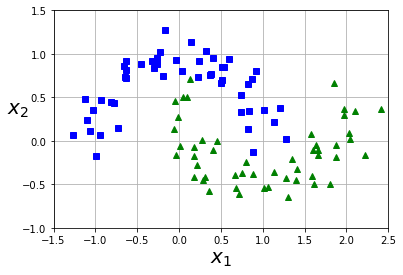

In [17]:
# load necessary package and methods, if you havne't
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# create a moon-shape dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# plot the samples, with two features and two labels, to see the non-linear trend
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [18]:
import numpy as np
print('Class labels:', np.unique(y))

Class labels: [0 1]


##### Split training sample to training set and test set

In [16]:
# load necessary package and methods, if you havne't
from sklearn.model_selection import train_test_split

# split the training data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
print(X_test.shape)
print(X_test)

(45, 2)
[[5.4 2.3]
 [1.7 0.4]
 [1.4 0.3]
 [4.5 1.7]
 [4.4 1.4]
 [4.  1.3]
 [5.8 1.8]
 [4.5 1.5]
 [5.3 1.9]
 [1.3 0.4]
 [1.5 0.4]
 [4.9 1.8]
 [1.4 0.2]
 [3.3 1. ]
 [1.4 0.2]
 [4.8 1.4]
 [5.1 2.3]
 [4.5 1.5]
 [4.3 1.3]
 [5.2 2. ]
 [5.9 2.1]
 [1.4 0.1]
 [4.4 1.4]
 [4.9 2. ]
 [4.2 1.3]
 [4.7 1.6]
 [3.  1.1]
 [5.7 2.5]
 [1.6 0.6]
 [5.  2. ]
 [1.6 0.2]
 [1.4 0.2]
 [4.  1. ]
 [4.  1.3]
 [6.3 1.8]
 [5.5 2.1]
 [1.4 0.1]
 [1.6 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [5.7 2.3]
 [5.1 1.8]
 [4.6 1.5]
 [1.5 0.2]
 [1.5 0.1]]


Questions:
- How many samples do you gerenerated? 100
- How many samples are in training set? 70
- How many samples are in test set? 45
- How many features does each sample have? 2

<a name="eg2-learning"></a>
#### Learning - Training an SVM with Kernel for Non-linear Classification Model

##### Use `Pipeline` to normalize or standardize data and build a SVM kernal function 
Fit or train a SVM linear classification model

In [18]:
# load necessary package and methods, if you havne't
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# build a SVM Classifier model
# set the classifier with pipeline (normalize features and then SVM classifier with kernel)
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])


poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

<a name="eg2-predict"></a>
#### Prediction
Predict the label or class for new x values (or new features)

In [19]:
# get prediction for a new observation with feature x1 as 1.5 and feature x2 as 0.5
X_new = np.array([[1.5,0.5]])
y_hat = poly_kernel_svm_clf.predict(X_new)
print(y_hat)

[0]


In [20]:
# get prediction for all the samples in the test set
y_hats = poly_kernel_svm_clf.predict(X_test)
print(y_hats)

[2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [21]:
# print the truth y_test
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


<a name="eg2-evaluate"></a>
#### Quick Model Eavluation: Classficiation Report


In [23]:
# load necessary package and methods, if you havne't
from sklearn.metrics import classification_report

# assign the names of the labels
target_names = ['class 0:', 'class 1:', 'class 2:']

# genereate and print the classification report
print(classification_report(y_test, y_hats, target_names=target_names))

              precision    recall  f1-score   support

    class 0:       1.00      1.00      1.00        15
    class 1:       0.94      1.00      0.97        15
    class 2:       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Questions:
- For each class:
    - What does precision mean? Number of correct results divided by the number of returned results. 
    - What does recall mean? Number of correct results divided by the number of results that should have been returned.
    - What does F-score (F1-score mean)? Measure of model accuracy, calculated by using harmonic mean of preicison and recall.
    - What does support mean? number of y_true occurences
- What does accuracy of the model mean? The accuracy refers to how many false negatives and positives there were. This model has an accuracy of .98 which makes it less accurate than the previous model that only had two class targets.
- How good is our SVM classification model does? This model is less accurate than the previous model; however, it is able to divide the iris samples into three total classes rather than two. Therefor, this model is more effective for our data set. 

#### Plot the decision boundary

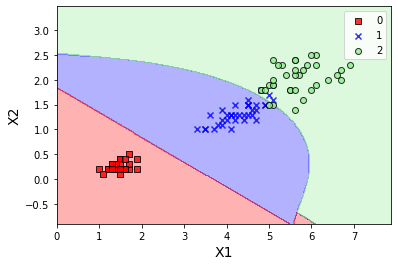

In [24]:
plot_decision_regions(X_train, y_train, poly_kernel_svm_clf)
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.legend(loc="best")
plt.show()

Acknolwedgement: Examples are adapted from textbook Hands-OnMachine Learning with Scikit Learn, Keras, and TensorFlow 2nd edition, textbook Python Machine Learning 3rd edition, and demo in UMASS CS335.

<a name="ex1"></a>
### Exercise - SVM with an Exteranl Dataset (Heart Disease Prediction)

Let build **SVM** classification with **anothe external data set "heart.csv"**


In this exercise, we will apply SVM Classficiation to an external dataset for heart disease prediction.


Please build a predictive model that answers the question: "Whether the presence of heart disease shows in a patient" using the patient data (i.e., age, gender, chest pain type,...) and decision tree learing algorithm. 

<a name="kaggle-heart"></a>
Data source:\
The data are from Kaggle and more details as well as data description can be found at https://www.kaggle.com/ronitf/heart-disease-uci. (The dataset is the "heart.csv" on the website. The labels are in the "target" column.)

#### Preprocessing
If you need help to load external data, please check previous lab exercises.

##### Load data

In [ ]:
# if you haven't loaded the package before, import the packages and methods

# read csv file into Python


In [ ]:
# double check the loaded data
# dimensions


# data information


# data summary

In [ ]:
# check missing values


# drop rows with missing values, if any


# double check

Note:\
You may want to check the [dropna function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) out.

Questions:
* Which column is the label or class?
* Which column are the features the label or class?
You may want to check the [data source](#kaggle-heart) for the details.

In [ ]:
# get the features (all of the features. do NOT include the label)


# double check data
# dimensions


# first five lines

Note:\
You may want to check the [drop function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) out.

In [ ]:
# any further preporcessing if needed, such as convert strings to numeric values



In [ ]:
# get the target values (which column to use?)


# check the dimension and the unique labels


Questions:
* How many samples do we have in the training set?
* How many features do we have for each sample?
* Which column should you use for the target values?

##### Split training samples into training set and test set

In [ ]:
# load necessary package and methods, if you havne't

# split the training data into training set and test set


In [ ]:
# cheking the data


#### Learning - Training a SVM Classification model
Fit or train an SVM classification model

Please use `Pipeline` to normalize data and build an SVM model

In [ ]:
# build your SVM model
# load necessary package and methods

# set the classifier

# fit the classifier from training set


#### Prediction

Predict whether the presence of heart disease shows in a patient with following feature values

age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca |thal
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
53 | 1 | 2 | 135 | 190 | 1 | 0 | 157 | 0 | 1.2 | 0 | 0 | 2

In [ ]:
# predict the presence of heart disease in a patient with the given feature values


Predict whether the presence of heart disease shows in all the patients in the test set

In [ ]:
# predict whether the presence of heart disease shows in all the patients in the test set


# print out the predicted labels


# print out the true labels


<a name="eg1-evaluate"></a>
#### Quick Model Eavluation: Classficiation Report


In [ ]:
# load necessary package and methods, if you havne't

# assign the names of the labels

# genereate and print the classification report


Questions:
- How many class do you have? What are they?
- For each class:
    - What does precision mean?
    - What does recall mean?
    - What does F-score (F1-score mean)?
    - What does support mean?
- What does accuracy of the model mean?
- How good is our SVM classification model does?